## Pump Curve Code 

This code finds the pump curve for the pump used 

In [71]:
#imports 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import datetime
import pathlib
from datetime import datetime
from dataclasses import dataclass
import math

the equation of the pump curve is -0.004119318181818178Q^2 + -0.1330681818181824Q + 245.33636363636367 


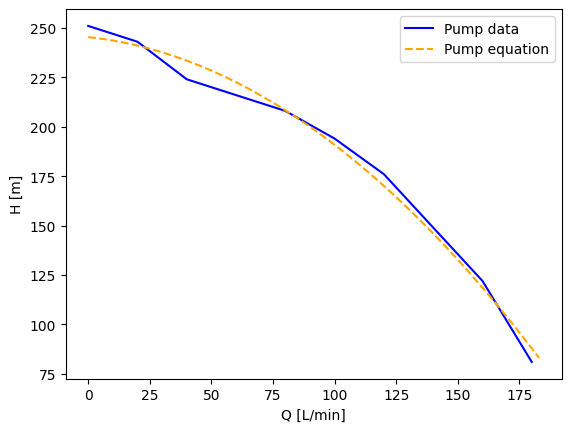

In [27]:
# pump data 

#Pump data from catalogue --> 4SD7/27 from (https://www.ochoa.com.do/media/pdf/03-04-5415-5416-5417-5418-5419.pdf)
Q = [0,20,40,60,80,100,120,140,160,180] #L/min
H = [251,243,224,216,208,194,176,149,122,81] #m
plt.plot(Q,H, color='blue', label='Pump data')

#Find equation of pump curve 
a, b,c = np.polyfit(Q, H, 2)
print(f"the equation of the pump curve is {a}Q^2 + {b}Q + {c} ")

#Graphing pump equation
xs = np.linspace(0, 183, 100)
ys = a*(xs**2) + b*(xs) + c
plt.plot(xs, ys, linestyle='dashed', color='orange', label='Pump equation')
plt.xlabel('Q [L/min]')
plt.ylabel('H [m]')
plt.legend()
plt.show()




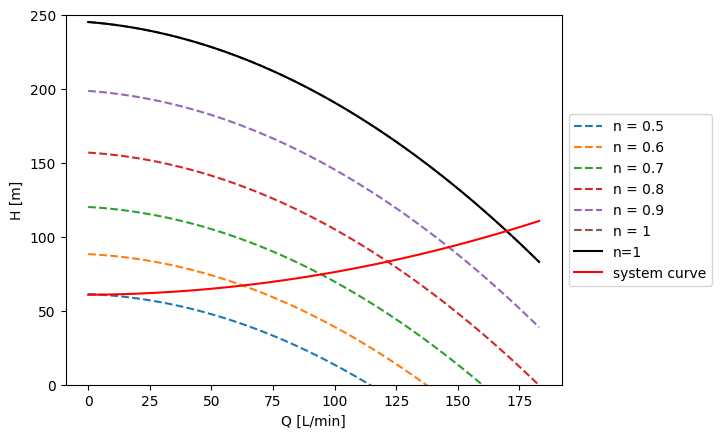

In [78]:
#Variable speed pump curve

n = [0.5,0.6,0.7,0.8,0.9,1] #nominal speed over actual speed of pump [RPM/RPM]


H_variable = [] #intiate empty list to add to
Q_OperationPoints = [] 
H_OperationPoints = []

def f(x): 
    return (a*(x**2) + b*(x)*n[i] + c*(n[i]**2)- (0.0014378405986266312*x**2 + 0.009691031163810078*x + 60.84508355565693))

for i in range (len(n)):
    H_variable.append( a*(xs**2) + b*(xs)*n[i] + c*(n[i]**2))
    plt.plot(xs, H_variable[i], linestyle='dashed', label=f'n = {n[i]}')
    Q_OperationPoints.append(sp.optimize.brentq( f,0,175))
    H_OperationPoints.append(0.0014378405986266312*Q_OperationPoints[i]**2 + 0.009691031163810078*Q_OperationPoints[i] + 60.84508355565693) 

ax = plt.plot(xs, ys, color='black', label='n=1')

H_system = 0.0014378405986266312*xs**2 + 0.009691031163810078*xs + 60.84508355565693 #3Ha system curve
plt.plot(xs, H_system, color='red', label='system curve')
plt.xlabel('Q [L/min]')
plt.ylabel('H [m]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,250)
plt.show()




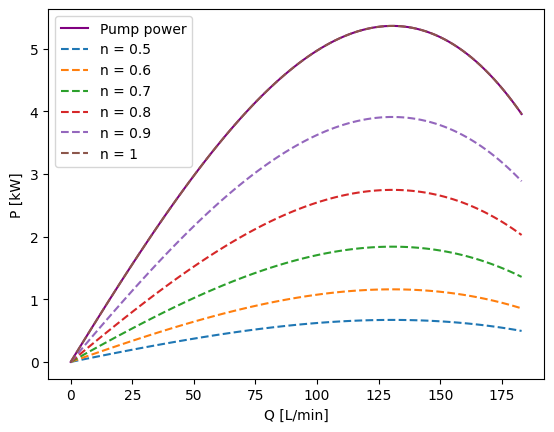

In [87]:

#efficiency of pump curve
Q_nominal = 120 / (60*1000) #m3/s
H_nominal = 176 #m
P_nominal = 5.5 * 1000 #W
rho = 1000 #kg/m3
g = 9.81 #m/s2
eff_pump = (Q_nominal*H_nominal*rho*g)/ (P_nominal) 

#Assuming constant efficiency of the pump 
P_pump = ((xs/(60*1000)) * ys * rho * g)/ (eff_pump * 1000) #kW

plt.plot(xs, P_pump, color='purple', label='Pump power')

P_variable = [] 
P_OperationPoints = []
for i in range (len(n)):
    P_variable.append(P_pump/(n[i]**-3))
    P_OperationPoints.append(((Q_OperationPoints[i]/(60*1000))*H_OperationPoints[i]*rho*g)/(eff_pump * 1000*n[i]**(-3)))
    plt.plot(xs, P_variable[i], linestyle='dashed', label=f'n = {n[i]}')
plt.xlabel('Q [L/min]')
plt.ylabel('P [kW]')
plt.legend()
plt.show()





Text(0, 0.5, 'P [kW]')

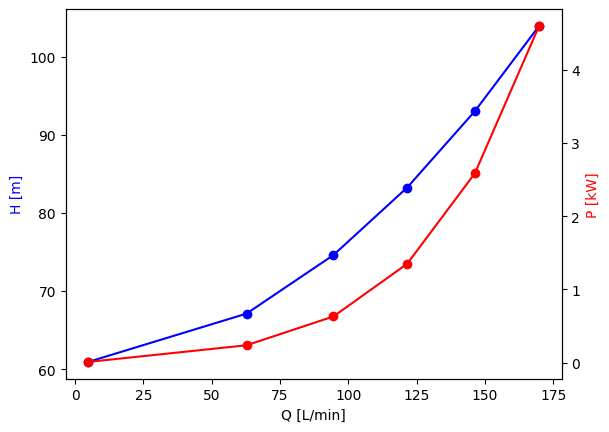

In [91]:
#Operational point graph 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Q_OperationPoints, H_OperationPoints,  label='Operation points', marker='o', color = 'blue')
ax1.set_xlabel('Q [L/min]')
ax1.set_ylabel('H [m]', color='blue')
ax2.plot(Q_OperationPoints, P_OperationPoints,  label='Power at Operation points', marker='o', color = 'red')
ax2.set_ylabel('P [kW]', color='red')


